# **Ford GoBike System Data project**

## Data Wrangling
1. Importing libraries
2. [Gather](#Gather)
3. Assess
4. [Clean](#cell22)
5. [Exploration](#cell78)
### 
* [Univariate Exploration](#cell89)
* [Bivariate Exploration](#cell132)
* [Multivariate Exploration](#cell175)

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1: Gather <a id="Gather"></a>

<a id="cell2"></a>

In [2]:
df = pd.read_csv(r'C:\Users\ilesanmi\Desktop\Udacity\Vis Proj\201902-fordgobike-tripdata.csv')

## Step 2: Assess

#### Used spreadsheet for visual assessment

In [3]:
df.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
df.member_birth_year

0         1984.0
1            NaN
2         1972.0
3         1989.0
4         1974.0
           ...  
183407    1996.0
183408    1984.0
183409    1990.0
183410    1988.0
183411    1989.0
Name: member_birth_year, Length: 183412, dtype: float64

In [6]:
df.shape

(183412, 16)

In [7]:
df.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [8]:
df.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

## Quality

1. start time, end_time should be in date-time format
2. start_station_id, end_station_id, bike_id should be object datatype 
3. member_birth_year should be an int not float
4. inconsistent decimal place of the longitudes and latitudes

5. creating an age column
6.  start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year, member_gender have missing datas
7. missing member birth year
8. member birth year 1878 is an outlier
9. add a column that changes duration_sec column to realtime
10. the member_age 119 should be 19 --- igored cause there are quite a good number of age above 100 as shown below

In [9]:
df.sample(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
123833,251,2019-02-11 09:04:30.3160,2019-02-11 09:08:41.5440,126.0,Esprit Park,37.761634,-122.390648,126.0,Esprit Park,37.761634,-122.390648,1677,Customer,1992.0,Female,No
82276,607,2019-02-18 10:43:39.7090,2019-02-18 10:53:46.8340,296.0,5th St at Virginia St,37.325998,-121.877120,279.0,Santa Clara St at 7th St,37.339146,-121.884105,3824,Subscriber,1992.0,Female,Yes
133467,523,2019-02-08 18:58:02.0640,2019-02-08 19:06:46.0510,310.0,San Fernando St at 4th St,37.335885,-121.885660,294.0,Pierce Ave at Market St,37.327581,-121.884559,1086,Subscriber,1993.0,Male,Yes


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [11]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


## Step 3: Clean <a id="cell22"></a>

#### Define:

#### 7. missing member birth year
i'll be needing the the member_birth_age column to deal with age of riders. Hence the need to replace it by the mean birth year (approximate mean)

### code:

In [12]:
df['member_birth_year'].describe()

count    175147.000000
mean       1984.806437
std          10.116689
min        1878.000000
25%        1980.000000
50%        1987.000000
75%        1992.000000
max        2001.000000
Name: member_birth_year, dtype: float64

In [13]:
df['member_birth_year'].fillna(value = 1985, inplace=True)

### Test:

In [14]:
df['member_birth_year'].describe()

count    183412.000000
mean       1984.815159
std           9.886200
min        1878.000000
25%        1981.000000
50%        1987.000000
75%        1992.000000
max        2001.000000
Name: member_birth_year, dtype: float64

#### Define
8. Remove the birth year 1878

#### Code:

In [15]:
df[df['member_birth_year'] == 1878]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
27370,1474,2019-02-25 09:28:42.1610,2019-02-25 09:53:17.0680,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,386.0,24th St at Bartlett St,37.752105,-122.419724,6436,Customer,1878.0,Female,No


In [16]:
#df = df.drop(df.index[27370], axis = 0,inplace = True)
df = df.drop(27370)

#### Test:

In [17]:
df[df['member_birth_year'] == 1878]
#df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip


#### Define:
1. change start_time column to date-time


#### Code:

In [18]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])



#### Test:

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183411 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183411 non-null  int64         
 1   start_time               183411 non-null  datetime64[ns]
 2   end_time                 183411 non-null  datetime64[ns]
 3   start_station_id         183214 non-null  float64       
 4   start_station_name       183214 non-null  object        
 5   start_station_latitude   183411 non-null  float64       
 6   start_station_longitude  183411 non-null  float64       
 7   end_station_id           183214 non-null  float64       
 8   end_station_name         183214 non-null  object        
 9   end_station_latitude     183411 non-null  float64       
 10  end_station_longitude    183411 non-null  float64       
 11  bike_id                  183411 non-null  int64         
 12  user_type       

### Define:
2. changing member_birth_year from float to int

#### Code:

In [20]:
df.member_birth_year = df.member_birth_year.apply('int64')

#### Test:

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183411 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183411 non-null  int64         
 1   start_time               183411 non-null  datetime64[ns]
 2   end_time                 183411 non-null  datetime64[ns]
 3   start_station_id         183214 non-null  float64       
 4   start_station_name       183214 non-null  object        
 5   start_station_latitude   183411 non-null  float64       
 6   start_station_longitude  183411 non-null  float64       
 7   end_station_id           183214 non-null  float64       
 8   end_station_name         183214 non-null  object        
 9   end_station_latitude     183411 non-null  float64       
 10  end_station_longitude    183411 non-null  float64       
 11  bike_id                  183411 non-null  int64         
 12  user_type       

In [22]:
df.sample()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
96977,274,2019-02-15 09:31:57.725,2019-02-15 09:36:31.808,195.0,Bay Pl at Vernon St,37.812314,-122.260779,182.0,19th Street BART Station,37.809013,-122.268247,2965,Subscriber,1989,Male,No


#### Define:
3. Columns: start_station_id,end_station_id, end_station_id, bike_id should be object and not float

#### Code:

In [23]:
df[['start_station_id','end_station_id', 'bike_id' ]] = df[['start_station_id','end_station_id', 'bike_id' ]].astype(object)

#### Test

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183411 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183411 non-null  int64         
 1   start_time               183411 non-null  datetime64[ns]
 2   end_time                 183411 non-null  datetime64[ns]
 3   start_station_id         183214 non-null  object        
 4   start_station_name       183214 non-null  object        
 5   start_station_latitude   183411 non-null  float64       
 6   start_station_longitude  183411 non-null  float64       
 7   end_station_id           183214 non-null  object        
 8   end_station_name         183214 non-null  object        
 9   end_station_latitude     183411 non-null  float64       
 10  end_station_longitude    183411 non-null  float64       
 11  bike_id                  183411 non-null  object        
 12  user_type       

In [25]:
df.sample()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
11865,569,2019-02-27 18:08:49.554,2019-02-27 18:18:18.715,280.0,San Fernando St at 7th St,37.337122,-121.883215,296.0,5th St at Virginia St,37.325998,-121.87712,5895,Subscriber,1995,Female,Yes


#### Define:
4. Make the decimal place of the longitudes and latitudes column consistent

#### Code:

In [26]:
df[['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude']] = df[['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude']].round(5)

#### Test:

In [27]:
df[['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude']]

,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude
0,37.78963,-122.40081,37.79423,-122.40292
1,37.79146,-122.39103,37.77588,-122.39317
2,37.76931,-122.42683,37.78638,-122.40490
3,37.77484,-122.44655,37.77331,-122.44429
4,37.80456,-122.27174,37.79271,-122.24878
...,...,...,...,...
183407,37.78806,-122.39186,37.78830,-122.40853
183408,37.78963,-122.40081,37.77874,-122.39274
183409,37.33193,-121.90489,37.33366,-121.90859
183410,37.81135,-122.27342,37.81783,-122.27570


In [28]:
df.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year
count,183411.000000,183411.000000,183411.000000,183411.000000,183411.000000,183411.000000
mean,726.074358,37.771223,-122.352663,37.771427,-122.352249,1984.815742
std,1794.393822,0.099582,0.117097,0.099490,0.116674,9.883080
min,61.000000,37.317300,-122.453700,37.317300,-122.453700,1900.000000
25%,325.000000,37.770080,-122.412410,37.770410,-122.411730,1981.000000
50%,514.000000,37.780760,-122.398280,37.781010,-122.398280,1987.000000
75%,796.000000,37.797280,-122.286530,37.797320,-122.288050,1992.000000
max,85444.000000,37.880220,-121.874120,37.880220,-121.874120,2001.000000


### Define:
5. add an age column -- 2019 - member_birth_year

### code:

In [29]:
df['member_age'] = 2019 - df['member_birth_year']

### Test:

In [30]:
df.sample()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
132272,783,2019-02-09 08:39:23.838,2019-02-09 08:52:26.967,98.0,Valencia St at 16th St,37.76505,-122.42187,74.0,Laguna St at Hayes St,37.77643,-122.42624,5034,Subscriber,1995,Male,No,24


### Define:
6.  start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year, member_gender have missing datas

*  drop columns with missing start_station_id as we are only to track those in this particular station. And a missing start_id indicates its not of this StopIteration
* I also observed that those same columns had their start_station_name, end_station_id, end_station_name empty... Hence dropping them is okay

### Code:

In [31]:
df_new = df[df['start_station_id'].isna() == False]
#df['start_station_id'].dropna(inplace = True)

### Test:

In [32]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183214 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183214 non-null  int64         
 1   start_time               183214 non-null  datetime64[ns]
 2   end_time                 183214 non-null  datetime64[ns]
 3   start_station_id         183214 non-null  object        
 4   start_station_name       183214 non-null  object        
 5   start_station_latitude   183214 non-null  float64       
 6   start_station_longitude  183214 non-null  float64       
 7   end_station_id           183214 non-null  object        
 8   end_station_name         183214 non-null  object        
 9   end_station_latitude     183214 non-null  float64       
 10  end_station_longitude    183214 non-null  float64       
 11  bike_id                  183214 non-null  object        
 12  user_type       

In [33]:
#Hence now, only the member gender is missing

### Define

#### 9. add a column that changes duration_sec column to realtime

#### Code:

In [34]:
import datetime
# # df['duration_time'] = str(datetime.timedelta(seconds=df['duration_sec']))

# # df['duration_time'] = pd.to_datetime(df['duration_time'])

# def change_to_datetime():
#     x = []
#     for i in range(len(df.duration_sec)):
#         x.append(str(datetime.timedelta(seconds=i)))
#     #print(x)
#     try:
#         df['duration_time'] = x
#     except:
#         return None

#     #to date-time column
#     try:
#         df['duration_time'] = pd.to_datetime(df['duration_time'])
#     except:
#         return None

# change_to_datetime()

df_new['duration_time'] = df_new['duration_sec'].apply(lambda i: str(datetime.timedelta(seconds=i)))
#error cause of the presence of '1 day...'

<ipython-input-34-c6fc9127901d>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['duration_time'] = df_new['duration_sec'].apply(lambda i: str(datetime.timedelta(seconds=i)))


#### Test:

In [36]:
df_new.sample(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,duration_time
143601,235,2019-02-07 14:56:55.115,2019-02-07 15:00:50.624,58.0,Market St at 10th St,37.77662,-122.41738,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.78107,-122.41174,1497,Subscriber,1996,Male,No,23,0:03:55
127926,1699,2019-02-10 14:13:55.105,2019-02-10 14:42:14.478,311.0,Paseo De San Antonio at 2nd St,37.33380,-121.88694,310.0,San Fernando St at 4th St,37.33588,-121.88566,4035,Subscriber,1998,Male,Yes,21,0:28:19


#sns.countplot(df.duration_time)
plt.hist(df.duration_time)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183411 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183411 non-null  int64         
 1   start_time               183411 non-null  datetime64[ns]
 2   end_time                 183411 non-null  datetime64[ns]
 3   start_station_id         183214 non-null  object        
 4   start_station_name       183214 non-null  object        
 5   start_station_latitude   183411 non-null  float64       
 6   start_station_longitude  183411 non-null  float64       
 7   end_station_id           183214 non-null  object        
 8   end_station_name         183214 non-null  object        
 9   end_station_latitude     183411 non-null  float64       
 10  end_station_longitude    183411 non-null  float64       
 11  bike_id                  183411 non-null  object        
 12  user_type       

# **Exploration** <a id="cell78"></a>

In [38]:
df_new['start_month'] = df_new['start_time'].apply(lambda time: time.month)
#mc = df['start_month_num'].apply(lambda x: calendar.month_abbr[x])



<ipython-input-38-e2688a207c26>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['start_month'] = df_new['start_time'].apply(lambda time: time.month)


In [39]:
df_new['start_month'].value_counts()

#just a month present -- february

2    183214
Name: start_month, dtype: int64

In [40]:
 # b. morning, afternoon, night of a day
df_new['start_hour'] = df_new['start_time'].apply(lambda time: time.hour)
df_new['day_time'] = 'morning'

df_new.loc[(df_new['start_hour'] > 12) & (df_new['start_hour'] <= 16), 'day_time'] = 'afternoon'
df_new.loc[(df_new['start_hour'] > 16) & (df_new['start_hour'] <= 19), 'day_time'] = 'evening'

df_new.loc[(df_new['start_hour'] > 19) & (df_new['start_hour'] <= 123), 'day_time'] = 'night'

df_new['day_time'].value_counts()

<ipython-input-40-b22b47388521>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['start_hour'] = df_new['start_time'].apply(lambda time: time.hour)
<ipython-input-40-b22b47388521>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['day_time'] = 'morning'
C:\Users\ilesanmi\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

morning      79111
evening      48532
afternoon    39979
night        15592
Name: day_time, dtype: int64

In [41]:
df_new.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,duration_time,start_month,start_hour,day_time
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.78963,-122.40081,13.0,Commercial St at Montgomery St,37.79423,...,4902,Customer,1984,Male,No,35,14:29:45,2,17,evening
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.79146,-122.39103,81.0,Berry St at 4th St,37.77588,...,2535,Customer,1985,NaN,No,34,11:48:41,2,18,evening
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.76931,-122.42683,3.0,Powell St BART Station (Market St at 4th St),37.78638,...,5905,Customer,1972,Male,No,47,17:10:54,2,12,morning
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.77484,-122.44655,70.0,Central Ave at Fell St,37.77331,...,6638,Subscriber,1989,Other,No,30,10:08:10,2,17,evening
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.80456,-122.27174,222.0,10th Ave at E 15th St,37.79271,...,4898,Subscriber,1974,Male,Yes,45,0:26:25,2,23,night


In [42]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183214 entries, 0 to 183411
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183214 non-null  int64         
 1   start_time               183214 non-null  datetime64[ns]
 2   end_time                 183214 non-null  datetime64[ns]
 3   start_station_id         183214 non-null  object        
 4   start_station_name       183214 non-null  object        
 5   start_station_latitude   183214 non-null  float64       
 6   start_station_longitude  183214 non-null  float64       
 7   end_station_id           183214 non-null  object        
 8   end_station_name         183214 non-null  object        
 9   end_station_latitude     183214 non-null  float64       
 10  end_station_longitude    183214 non-null  float64       
 11  bike_id                  183214 non-null  object        
 12  user_type       

## Univariate Exploration
<a id="cell89"></a>


### 
* The most common gender 

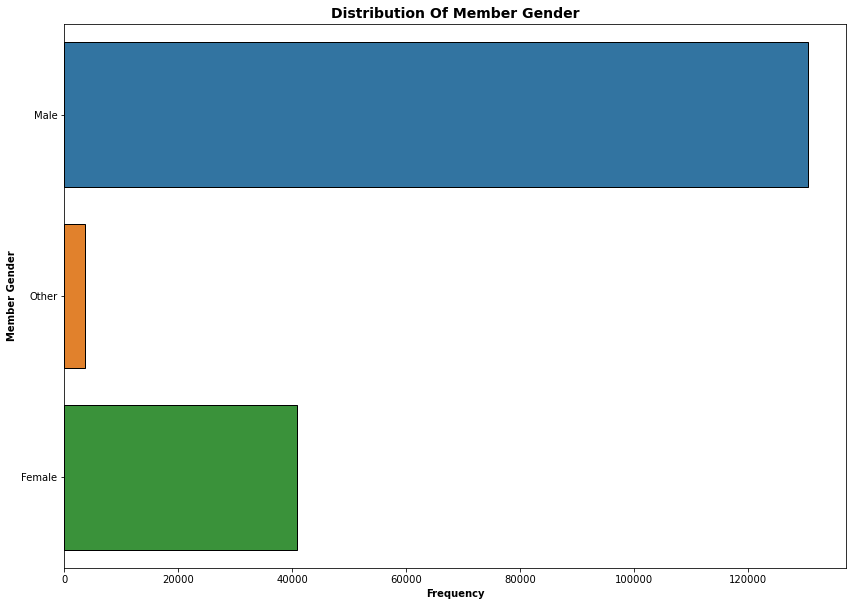

In [43]:

def myCountPlot(df, xVar, order = None, hueOrder = None, palette = None, figsize=[14,10]):
    plt.figure(figsize=figsize)

    c=sns.countplot(data=df, y = xVar, edgecolor = 'black', order = order, hue_order = hueOrder, palette=palette)
    xVar = xVar.replace('_', ' ')
    #hueVar = hueVar.replace('_', ' ')
    plt.title(f'''Distribution of {xVar}'''.title(), fontsize = 14, weight = 'bold')
    plt.ylabel(xVar.title(), fontsize=10, weight ='bold')
    plt.xlabel('Frequency'.title(), fontsize = 10, weight = 'bold')

myCountPlot(df_new, 'member_gender')
# df_new.member_gender.value_counts().plot(kind = 'barh');
# plt.title('Gender count')
# plt.ylabel('Gender')
# plt.xlabel('Count')

##### **Observation:** We have more male than females probably because Males tends to be more interested in cycling than Females

###
* What period of the day do people bike alot

In [44]:
df_new['day_time'].value_counts()

morning      79111
evening      48532
afternoon    39979
night        15592
Name: day_time, dtype: int64

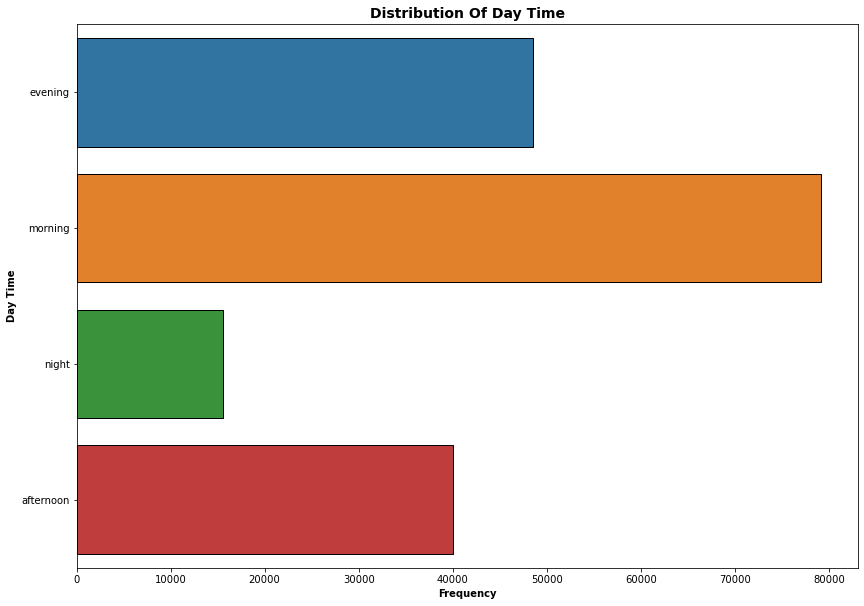

In [45]:
myCountPlot(df_new, 'day_time')


# df_new['day_time'].value_counts().plot(kind = 'barh');
# plt.title('day time people bike')
# plt.xlabel('Count')
# plt.ylabel('Time of the day')

#### **Observation:** During the day, there are more trips in the morning and afternoon than at night. It probably because of rush hours. There are more rides in the afternoon... this i believe is cause of students who return frm school and goes biking. And then, at night, peeps tend return home


* what hour of the day do they bike mostly 

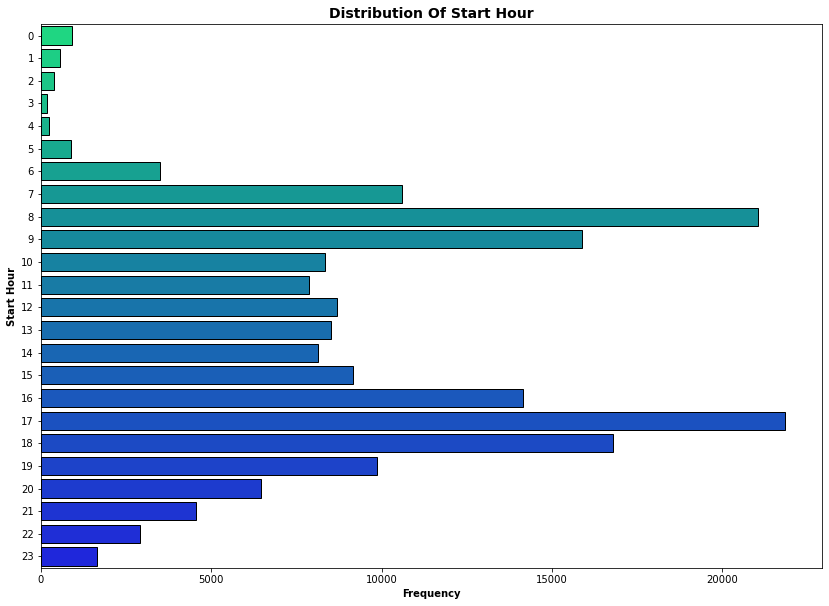

In [46]:
# plt.figure(figsize = (12,8))
# df_new.start_hour.value_counts().plot(kind = 'bar')
# plt.title('Hours people bike mostly')
# plt.xlabel('Hours')
# plt.ylabel('Count')


myCountPlot(df_new, 'start_hour', palette='winter_r')


#### **Observation:** As seen, the most time of the day people bike is in the evening-- 5pm and morning -- 8am. This could be due to time they close from work and time they resumed work

### Let's compare with the end station names and time
### Are there more rides at the end station than at the start station

In [47]:
df.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.78963,-122.40081,13.0,Commercial St at Montgomery St,37.79423,-122.40292,4902,Customer,1984,Male,No,35
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.79146,-122.39103,81.0,Berry St at 4th St,37.77588,-122.39317,2535,Customer,1985,NaN,No,34


In [48]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183214 entries, 0 to 183411
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183214 non-null  int64         
 1   start_time               183214 non-null  datetime64[ns]
 2   end_time                 183214 non-null  datetime64[ns]
 3   start_station_id         183214 non-null  object        
 4   start_station_name       183214 non-null  object        
 5   start_station_latitude   183214 non-null  float64       
 6   start_station_longitude  183214 non-null  float64       
 7   end_station_id           183214 non-null  object        
 8   end_station_name         183214 non-null  object        
 9   end_station_latitude     183214 non-null  float64       
 10  end_station_longitude    183214 non-null  float64       
 11  bike_id                  183214 non-null  object        
 12  user_type       

In [49]:
 # b. morning, afternoon, night of a day
# df_new['end_hour'] = df_new['end_time'].apply(lambda time: time.hour)
# df_new['return_time'] = 'morning'
# df_new['return_time'][(df_new['end_hour'] > 12) & (df_new['end_hour'] <= 16)] = 'afternoon'
# df_new['return_time'][(df_new['end_hour'] > 16) & (df_new['start_hour'] <= 19)] = 'evening'

# df_new['return_time'][(df_new['end_hour'] > 19) & (df_new['end_hour'] <= 23)] = 'night'


df_new['end_hour'] = df_new['end_time'].apply(lambda time: time.hour)
df_new['return_time'] = 'morning'

df_new.loc[(df_new['end_hour'] > 12) & (df_new['end_hour'] <= 16), 'return_time'] = 'afternoon'
df_new.loc[(df_new['end_hour'] > 16) & (df_new['end_hour'] <= 16), 'return_time'] = 'evening'

df_new.loc[(df_new['end_hour'] > 19) & (df_new['end_hour'] <= 16), 'return_time'] = 'night'

#df_new['day_time'].value_counts()


<ipython-input-49-2c9267051aa8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['end_hour'] = df_new['end_time'].apply(lambda time: time.hour)
<ipython-input-49-2c9267051aa8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['return_time'] = 'morning'
C:\Users\ilesanmi\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

Text(0.5, 1.0, 'return time people bike')

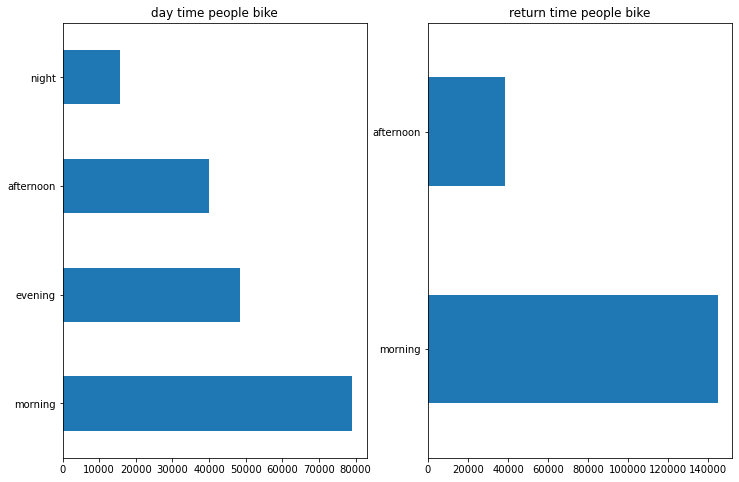

In [50]:
plt.figure(figsize = (12,8))
plt.subplot(1,2,1)
df_new['day_time'].value_counts().plot(kind = 'barh');
plt.title('day time people bike')

plt.subplot(1,2,2)
df_new['return_time'].value_counts().plot(kind = 'barh');
plt.title('return time people bike')



In [51]:
df_new['day_time'].value_counts(), df_new['return_time'].value_counts()

(morning      79111
 evening      48532
 afternoon    39979
 night        15592
 Name: day_time, dtype: int64,
 morning      144586
 afternoon     38628
 Name: return_time, dtype: int64)

#### **Observation:** There are lesser rides at the end station than at the start station. Probably cause the data is only restricted to just san fracisco

In [52]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'member_age'],
      dtype='object')

### 
* What user type uses the bike mostly

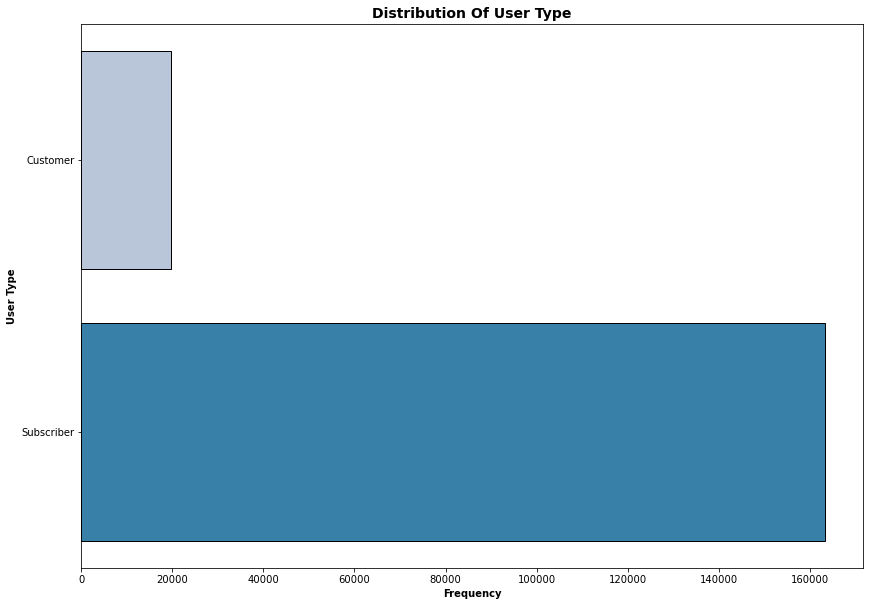

In [53]:
# df_new['user_type'].value_counts().plot(kind = 'bar')
# plt.title('Bike user types')
# plt.ylabel('Count')
# plt.xlabel('User types of the services')

myCountPlot(df_new, 'user_type', palette='PuBu')


#### **observation:** so we have more of subscribers than customers

In [54]:
df_new.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,member_age,duration_time,start_month,start_hour,day_time,end_hour,return_time
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.78963,-122.40081,13.0,Commercial St at Montgomery St,37.79423,...,1984,Male,No,35,14:29:45,2,17,evening,8,morning
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.79146,-122.39103,81.0,Berry St at 4th St,37.77588,...,1985,NaN,No,34,11:48:41,2,18,evening,6,morning
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.76931,-122.42683,3.0,Powell St BART Station (Market St at 4th St),37.78638,...,1972,Male,No,47,17:10:54,2,12,morning,5,morning
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.77484,-122.44655,70.0,Central Ave at Fell St,37.77331,...,1989,Other,No,30,10:08:10,2,17,evening,4,morning
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.80456,-122.27174,222.0,10th Ave at E 15th St,37.79271,...,1974,Male,Yes,45,0:26:25,2,23,night,0,morning


* Top ten start_station

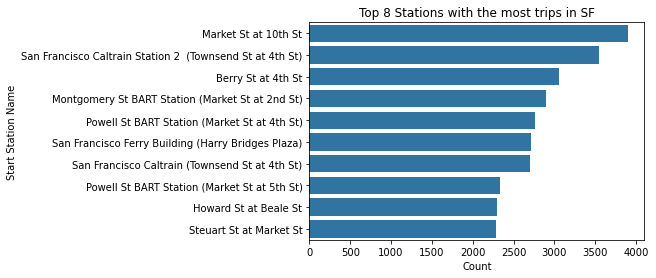

In [55]:
top10 = ['Market St at 10th St','San Francisco Caltrain Station 2  (Townsend St at 4th St)','Berry St at 4th St','Montgomery St BART Station (Market St at 2nd St)','Powell St BART Station (Market St at 4th St)'
,'San Francisco Ferry Building (Harry Bridges Plaza)','San Francisco Caltrain (Townsend St at 4th St)', 'Powell St BART Station (Market St at 5th St)','Howard St at Beale St','Steuart St at Market St']

df_top_ten = df_new.loc[df_new['start_station_name'].isin(top10)]

#df_top_ten
st_stat_order = df_top_ten['start_station_name'].value_counts().index

base_color = sns.color_palette()[0]
sns.countplot(data=df_top_ten, y='start_station_name', color=base_color, order=st_stat_order)
plt.xlabel('Count')
plt.ylabel('Start Station Name')
plt.title('Top 8 Stations with the most trips in SF');


In [56]:
df_new['start_station_name'].value_counts().nlargest(10)

Market St at 10th St                                         3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3544
Berry St at 4th St                                           3052
Montgomery St BART Station (Market St at 2nd St)             2895
Powell St BART Station (Market St at 4th St)                 2760
San Francisco Ferry Building (Harry Bridges Plaza)           2709
San Francisco Caltrain (Townsend St at 4th St)               2703
Powell St BART Station (Market St at 5th St)                 2327
Howard St at Beale St                                        2293
Steuart St at Market St                                      2283
Name: start_station_name, dtype: int64

* Top ten end station

In [57]:
df_new['end_station_name'].value_counts().nlargest(10)

San Francisco Caltrain Station 2  (Townsend St at 4th St)    4857
Market St at 10th St                                         3973
Montgomery St BART Station (Market St at 2nd St)             3647
San Francisco Ferry Building (Harry Bridges Plaza)           3368
Powell St BART Station (Market St at 4th St)                 2997
San Francisco Caltrain (Townsend St at 4th St)               2947
Berry St at 4th St                                           2872
The Embarcadero at Sansome St                                2512
Powell St BART Station (Market St at 5th St)                 2353
Steuart St at Market St                                      2338
Name: end_station_name, dtype: int64

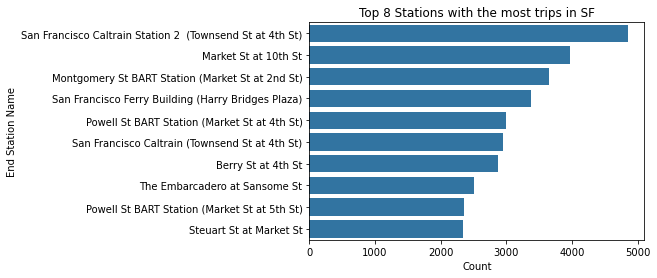

In [58]:
top10 = ['San Francisco Caltrain Station 2  (Townsend St at 4th St)','Market St at 10th St','Montgomery St BART Station (Market St at 2nd St)','San Francisco Ferry Building (Harry Bridges Plaza)','Powell St BART Station (Market St at 4th St)',
'San Francisco Caltrain (Townsend St at 4th St)','Berry St at 4th St','The Embarcadero at Sansome St','Powell St BART Station (Market St at 5th St)','Steuart St at Market St']

df_top_ten_2 = df_new.loc[df_new['end_station_name'].isin(top10)]

#df_top_ten
st_stat_order = df_top_ten_2['end_station_name'].value_counts().index

base_color = sns.color_palette()[0]
sns.countplot(data=df_top_ten_2, y='end_station_name', color=base_color, order=st_stat_order)
plt.xlabel('Count')
plt.ylabel('End Station Name')
plt.title('Top 8 Stations with the most trips in SF');


#### **Observation:** San Francisco Caltrain Station 2  (Townsend St at 4th St) seems to be a veery busy place. It tops the return location and seconds the start_ride_location. But still the top 10 start station and end station are about the same stations

## *Statistics of the ride duration*

In [59]:
df_new['duration_sec'].describe()

count    183214.000000
mean        725.897934
std        1795.082702
min          61.000000
25%         325.000000
50%         514.000000
75%         796.000000
max       85444.000000
Name: duration_sec, dtype: float64

### Statistics of the member age

In [60]:
df_new['member_age'].describe()

count    183214.000000
mean         34.187404
std           9.884882
min          18.000000
25%          27.000000
50%          32.000000
75%          38.000000
max         119.000000
Name: member_age, dtype: float64

In [61]:
df_new.sample()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,member_age,duration_time,start_month,start_hour,day_time,end_hour,return_time
147632,552,2019-02-07 07:31:39.989,2019-02-07 07:40:52.283,169.0,Bushrod Park,37.84652,-122.2653,252.0,Channing Way at Shattuck Ave,37.86585,...,1985,Male,No,34,0:09:12,2,7,morning,7,morning


# Bivariate Exploration
<a id="cell132"></a>

### **What is the Relationship between ride duration and member_age?**

Text(0.5, 0, 'age')

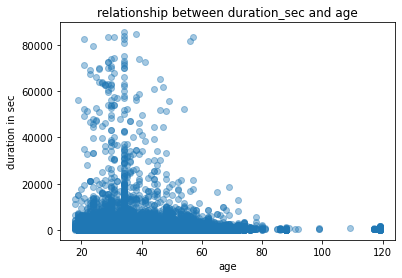

In [62]:
plt.scatter(df_new.member_age,df_new.duration_sec, alpha = 0.4)
plt.title('relationship between duration_sec and age')
plt.ylabel('duration in sec')
plt.xlabel('age')

#### A quick check on Which gender rides most

In [63]:
df_new.member_gender.value_counts()

Male      130500
Female     40804
Other       3647
Name: member_gender, dtype: int64

Text(0.5, 0, 'age')

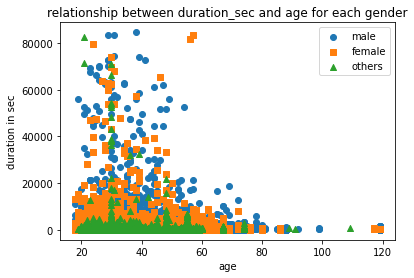

In [64]:
markers = [['Male', 'o'],
               ['Female', 's'], ['Other', '^']]

for c, marker in markers: #a loop created
    df_c = df_new[df_new['member_gender'] == c]
    plt.scatter(data = df_c, x = 'member_age', y = 'duration_sec', marker = marker)
plt.legend(['male','female','others'])
plt.title('relationship between duration_sec and age for each gender')
plt.ylabel('duration in sec')
plt.xlabel('age')

In [65]:
df_new.member_age.describe()

count    183214.000000
mean         34.187404
std           9.884882
min          18.000000
25%          27.000000
50%          32.000000
75%          38.000000
max         119.000000
Name: member_age, dtype: float64

In [66]:
df_new[df_new['member_age'] == 119].head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,member_age,duration_time,start_month,start_hour,day_time,end_hour,return_time
1285,148,2019-02-28 19:29:17.627,2019-02-28 19:31:45.967,158.0,Shattuck Ave at Telegraph Ave,37.83328,-122.26349,173.0,Shattuck Ave at 55th St,37.84036,...,1900,Male,Yes,119,0:02:28,2,19,evening,19,morning
10827,1315,2019-02-27 19:21:34.436,2019-02-27 19:43:30.008,343.0,Bryant St at 2nd St,37.78317,-122.39357,375.0,Grove St at Masonic Ave,37.77484,...,1900,Male,No,119,0:21:55,2,19,evening,19,morning
16087,1131,2019-02-27 08:37:36.864,2019-02-27 08:56:28.022,375.0,Grove St at Masonic Ave,37.77484,-122.44655,36.0,Folsom St at 3rd St,37.78383,...,1900,Male,No,119,0:18:51,2,8,morning,8,morning
19375,641,2019-02-26 17:03:19.855,2019-02-26 17:14:01.619,9.0,Broadway at Battery St,37.79857,-122.40087,30.0,San Francisco Caltrain (Townsend St at 4th St),37.77660,...,1900,Male,No,119,0:10:41,2,17,evening,17,morning
21424,1424,2019-02-26 08:58:02.904,2019-02-26 09:21:47.749,375.0,Grove St at Masonic Ave,37.77484,-122.44655,343.0,Bryant St at 2nd St,37.78317,...,1900,Male,No,119,0:23:44,2,8,morning,9,morning


#### Further look

C:\Users\ilesanmi\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


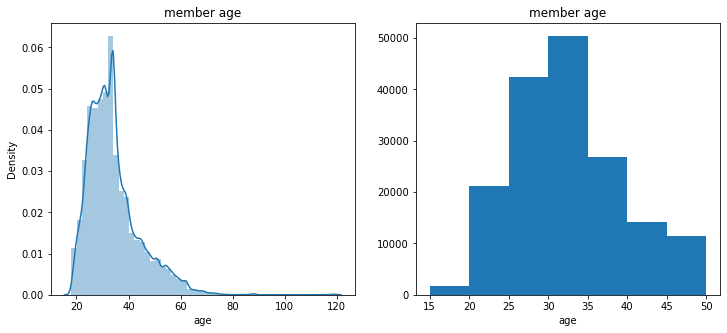

In [67]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.distplot(df_new['member_age']);
plt.title('member age')
plt.xlabel('age')

plt.subplot(1,2,2)
bb = np.arange(15, df_new['member_age'].mean()+20, 5)
plt.hist(df_new['member_age'], bins = bb);
plt.title('member age')
plt.xlabel('age')
plt.show()

#### good number of the memmber_ages are between 20 and 50

Text(0.5, 0, 'age bewteen 20 and 50')

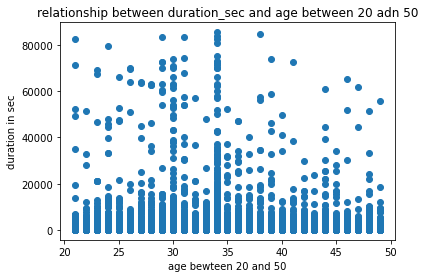

In [68]:
#plt.figure(figsize = (16,12))
active_ages = df_new.query('member_age > 20 & member_age<50')
#active_ages

plt.scatter(active_ages['member_age'], active_ages['duration_sec'])
plt.title('relationship between duration_sec and age between 20 adn 50')
plt.ylabel('duration in sec')
plt.xlabel('age bewteen 20 and 50')

#### **observation:** More duration time on the left side of age 35

In [69]:
age_below_100 = df_new[df_new['member_age']<= 100]

Text(0.5, 0, 'age less than 100')

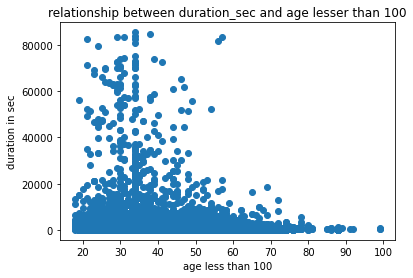

In [70]:
plt.scatter(age_below_100['member_age'],age_below_100['duration_sec'])
plt.title('relationship between duration_sec and age lesser than 100')
plt.ylabel('duration in sec')
plt.xlabel('age less than 100')

#### **Final Observation:** There's a slight negative correlation between duration and member_age. 
* And this is normal because the duration really has nothing to do with age though (as seen too), younger people tend to ride longer

## Average age for genders

Text(0.5, 0, 'Gender')

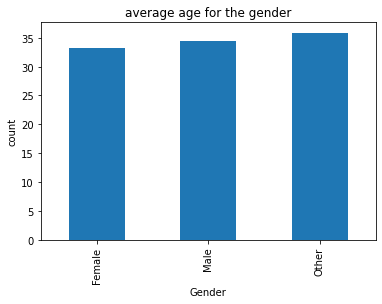

In [71]:
df_new.groupby('member_gender')['member_age'].mean().plot(kind = 'bar')
plt.title('average age for the gender')
plt.ylabel('count')
plt.xlabel('Gender')

In [72]:
df_new.groupby('member_gender')['member_age'].describe()

,count,mean,std,min,25%,50%,75%,max
member_gender,,,,,,,,
Female,40804.0,33.221057,9.268773,18.0,27.0,31.0,37.0,119.0
Male,130500.0,34.453617,10.345189,18.0,27.0,32.0,39.0,119.0
Other,3647.0,35.897998,10.098447,19.0,29.0,34.0,40.0,109.0


#### **observation:** they are about the same mean age even with more of male than others and spanning ranges

In [73]:
df_new.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'member_age', 'duration_time', 'start_month', 'start_hour', 'day_time',
       'end_hour', 'return_time'],
      dtype='object')

## **For the top 10 stations, how are the rides for each time of the day**

#### Number of trips for each day time -- morning, afternoon, evening and night

In [74]:
##Ordering the days

# # days
# day_ = ['Morning', 'Afternoon', 'Evening', 'Night']


# day_t = pd.api.types.CategoricalDtype(ordered=True, categories=day_)
# return_t = pd.api.types.CategoricalDtype(ordered=True, categories=day_)

# # Use pandas.astype() to convert the "days" column from a plain object type into an ordered categorical type 
# df_top_ten['return_time'] = df_top_ten['return_time'].astype(return_t);
# df_top_ten['day_time'] = df_top_ten['day_time'].astype(day_t);

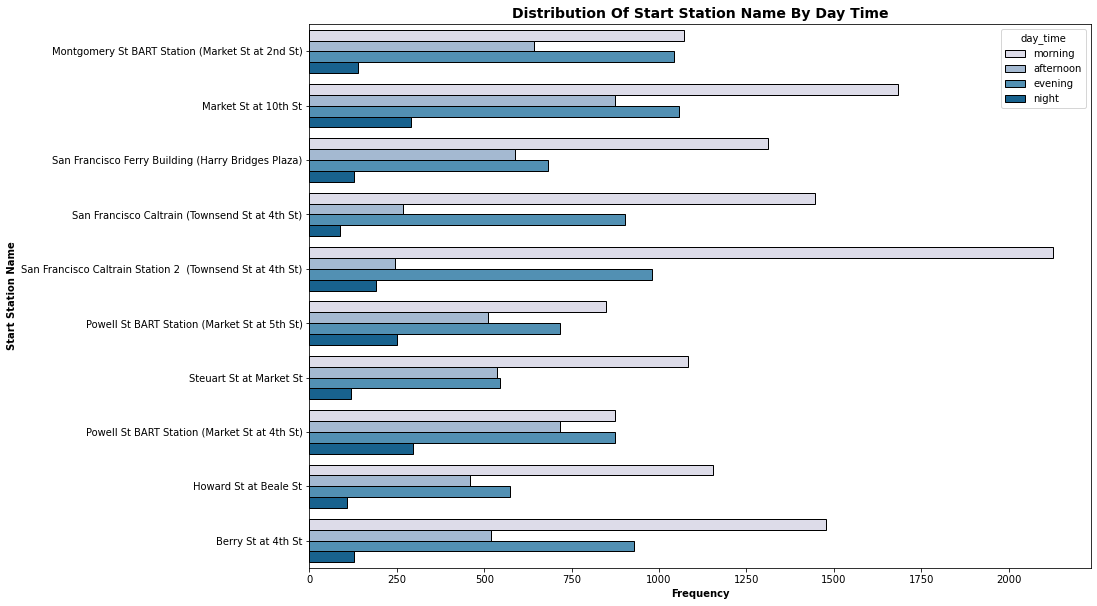

In [75]:

def myCountPlotH(df, xVar, hueVar, order = None, hueOrder = None, palette = None, figsize=[14,10]):
    plt.figure(figsize=figsize)

    c=sns.countplot(data=df, y = xVar, hue = hueVar, edgecolor = 'black', order = order, hue_order = hueOrder, palette=palette)
    xVar = xVar.replace('_', ' ')
    hueVar = hueVar.replace('_', ' ')
    plt.title(f'''Distribution of {xVar} by {hueVar}'''.title(), fontsize = 14, weight = 'bold')
    plt.ylabel(xVar.title(), fontsize=10, weight ='bold')
    plt.xlabel('Frequency'.title(), fontsize = 10, weight = 'bold')

day_time_order = ['morning', 'afternoon', 'evening', 'night']

myCountPlotH(df_top_ten, 'start_station_name', 'day_time', hueOrder=day_time_order, palette = 'PuBu')

# fig = plt.figure(figsize=(8,10))
# #plt.subplots_adjust(top=0.95)
# fig.suptitle('Count of trips for each day time', fontsize=14)


# sns.countplot(data=df_top_ten, y='start_station_name', hue='day_time')
# plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
# plt.ylabel('Start Station Name')
# plt.xlabel('Count');

#### checking the return time 

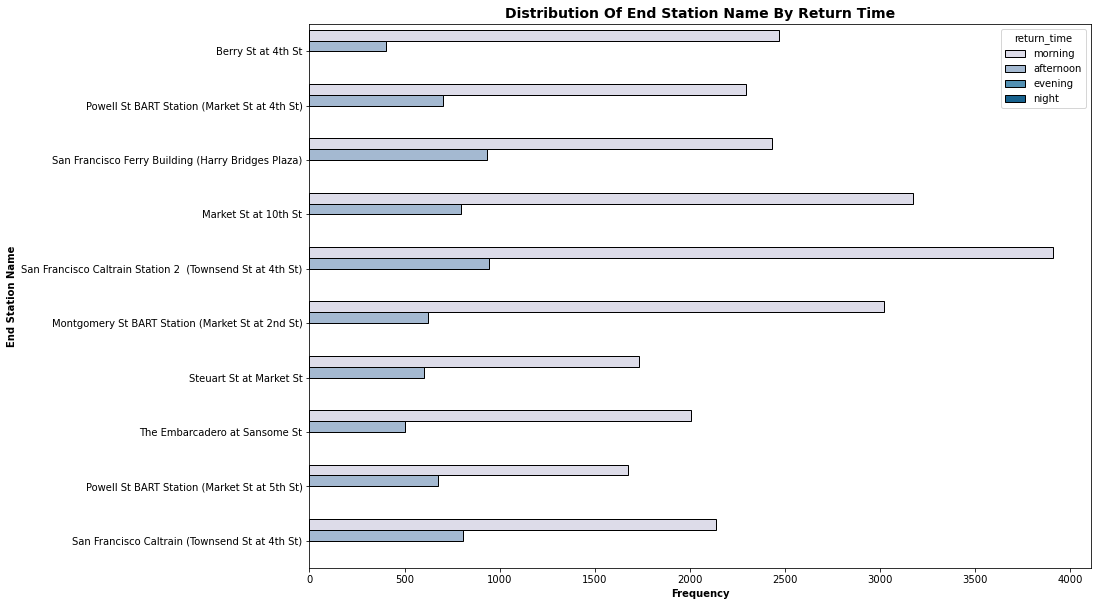

In [76]:

day_time_order = ['morning', 'afternoon', 'evening', 'night']

myCountPlotH(df_top_ten_2, 'end_station_name', 'return_time', hueOrder=day_time_order, palette = 'PuBu')


#### **Observation:** So, aside morning, most of the rides are between 5pm and 7pm --- evening and also, sanfrancisco seems to be a very busy industrious area

### Number of Usertypes for the top10 stations

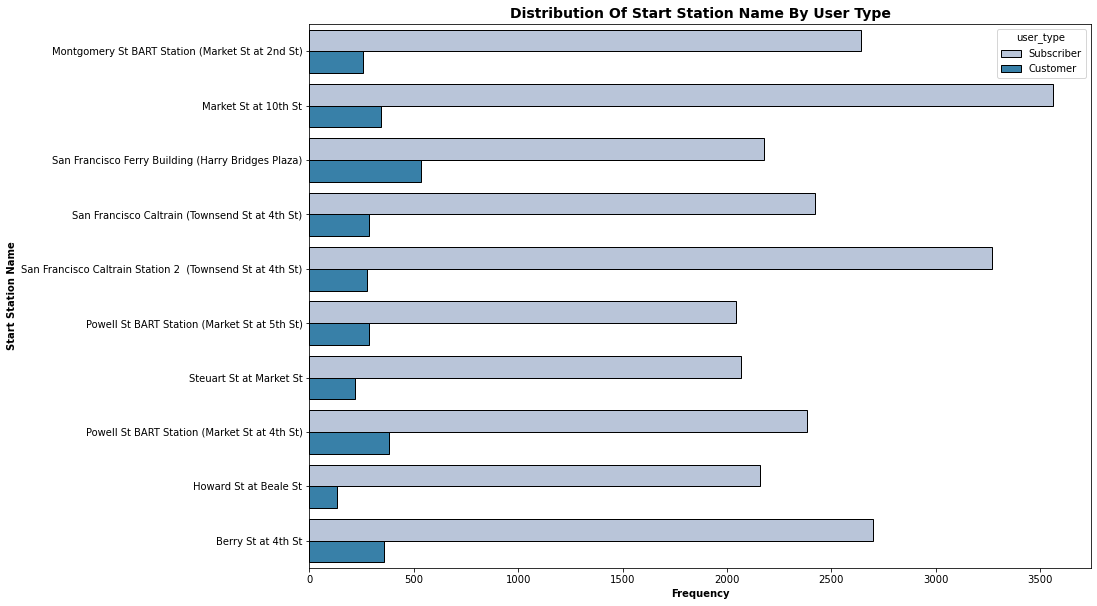

In [77]:
user_t = ['Subscriber', 'Customer']

myCountPlotH(df_top_ten, 'start_station_name', 'user_type', hueOrder=user_t, palette = 'PuBu')

# fig = plt.figure(figsize=(10,10))
# fig.suptitle('count of user type per station' , fontsize=14)


# sns.countplot(data=df_top_ten, y='start_station_name', hue='user_type')
# plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
# plt.ylabel('Top 10 start Station Name')
# plt.xlabel('Count');

In [78]:
#### End station check

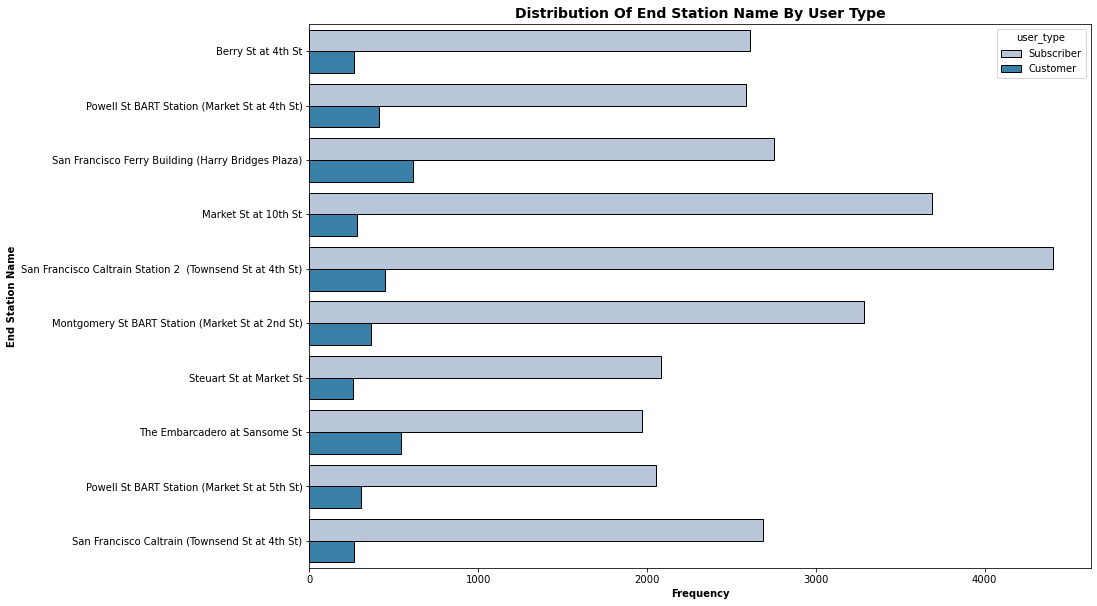

In [79]:
myCountPlotH(df_top_ten_2, 'end_station_name', 'user_type', hueOrder=user_t, palette = 'PuBu')


# fig = plt.figure(figsize=(10,10))
# fig.suptitle('count of user type per station' , fontsize=14)


# sns.countplot(data=df_top_ten_2, y='end_station_name', hue='user_type')
# plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
# plt.ylabel('Top 10 start Station Name')
# plt.xlabel('Count');

#### **Observation:** There are places with good high number of customers like San francisco Ferry building and the The Embarcadero at Sansome St 

##### 
*Generally, we know we have more subscribers than customers... but san fransisco seems to have a goog number of Customers compared to other stations. 
There could be reasons why

In [80]:
df_new.sample(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,member_age,duration_time,start_month,start_hour,day_time,end_hour,return_time
115748,695,2019-02-12 08:23:11.255,2019-02-12 08:34:46.544,109.0,17th St at Valencia St,37.76332,-122.42190,90.0,Townsend St at 7th St,37.77106,...,1989,Female,No,30,0:11:35,2,8,morning,8,morning
154149,721,2019-02-06 10:18:23.024,2019-02-06 10:30:24.873,22.0,Howard St at Beale St,37.78976,-122.39464,101.0,15th St at Potrero Ave,37.76708,...,1987,Male,No,32,0:12:01,2,10,morning,10,morning
14546,601,2019-02-27 11:58:42.986,2019-02-27 12:08:44.761,126.0,Esprit Park,37.76163,-122.39065,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.78487,...,1989,Male,No,30,0:10:01,2,11,morning,12,morning


In [81]:
df_new.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'member_age', 'duration_time', 'start_month', 'start_hour', 'day_time',
       'end_hour', 'return_time'],
      dtype='object')

## Multivariate 
<a id="cell175"></a>


### Another look into the number of rides per daytime

<Figure size 2016x720 with 0 Axes>

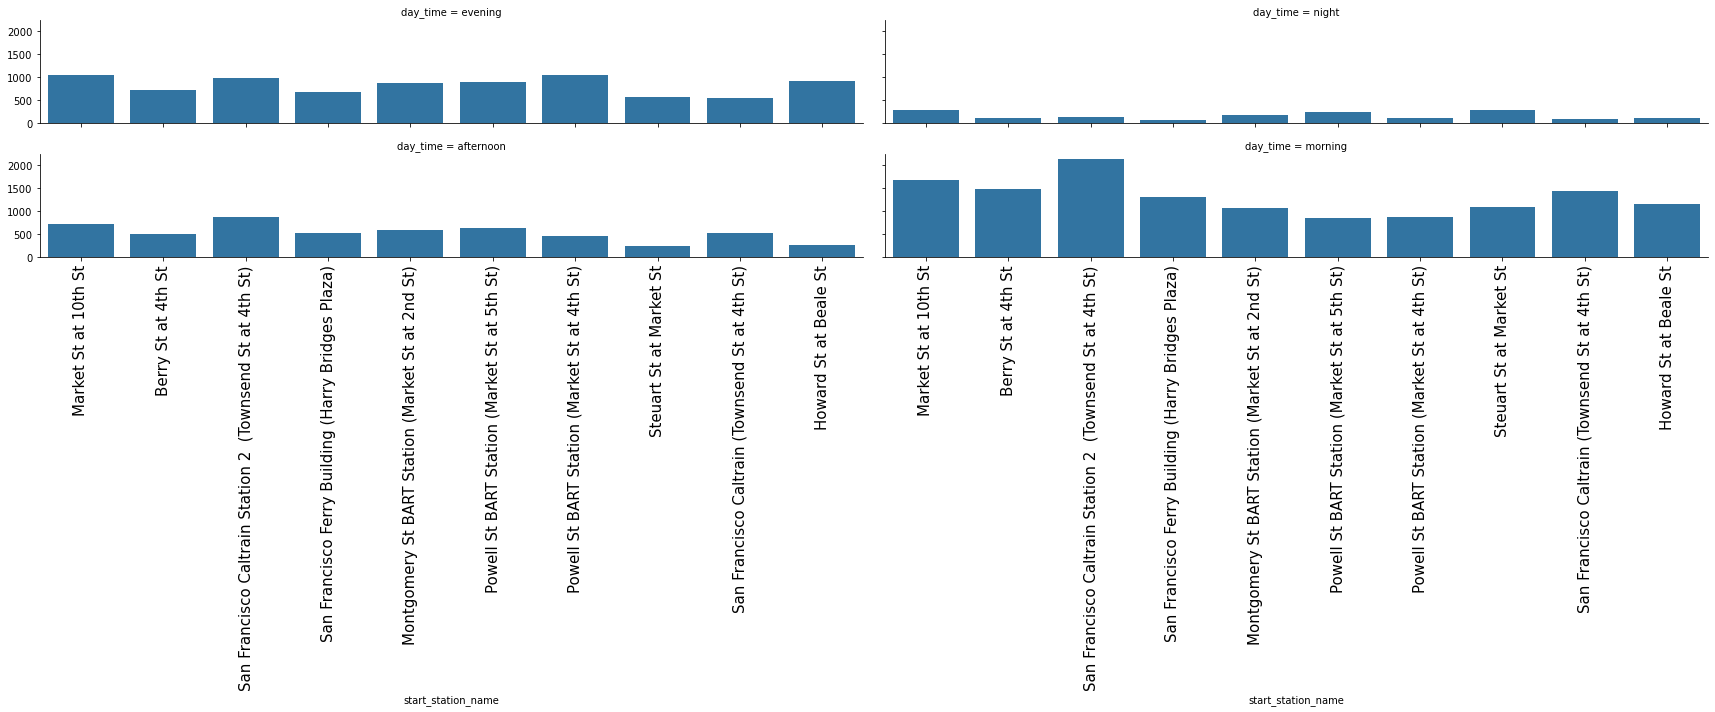

In [82]:
# g = sns.FacetGrid(data = df_top_ten, col = 'day_time', size = 7 );
# g.map(sns.countplot, 'start_station_name');
# g.set_xticklabels(rotation = 90, fontsize = 15)
# plt.show()


plt.figure(figsize=(28,10))
g = sns.FacetGrid(data = df_top_ten, col = 'day_time', col_wrap=2);
g.map(sns.countplot,'start_station_name', order = None);
g.set_xticklabels(rotation = 90, fontsize = 15)
g.fig.set_size_inches(24,10);
plt.tight_layout();
#plt.title('Facet look into the start station name, time and ride')

####
* more evident of how there are more rides in the morning and evening

#### 
* So, the order is morning > evening > afternoon > night

### checking for return_ride

C:\Users\ilesanmi\Anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


<Figure size 2016x720 with 0 Axes>

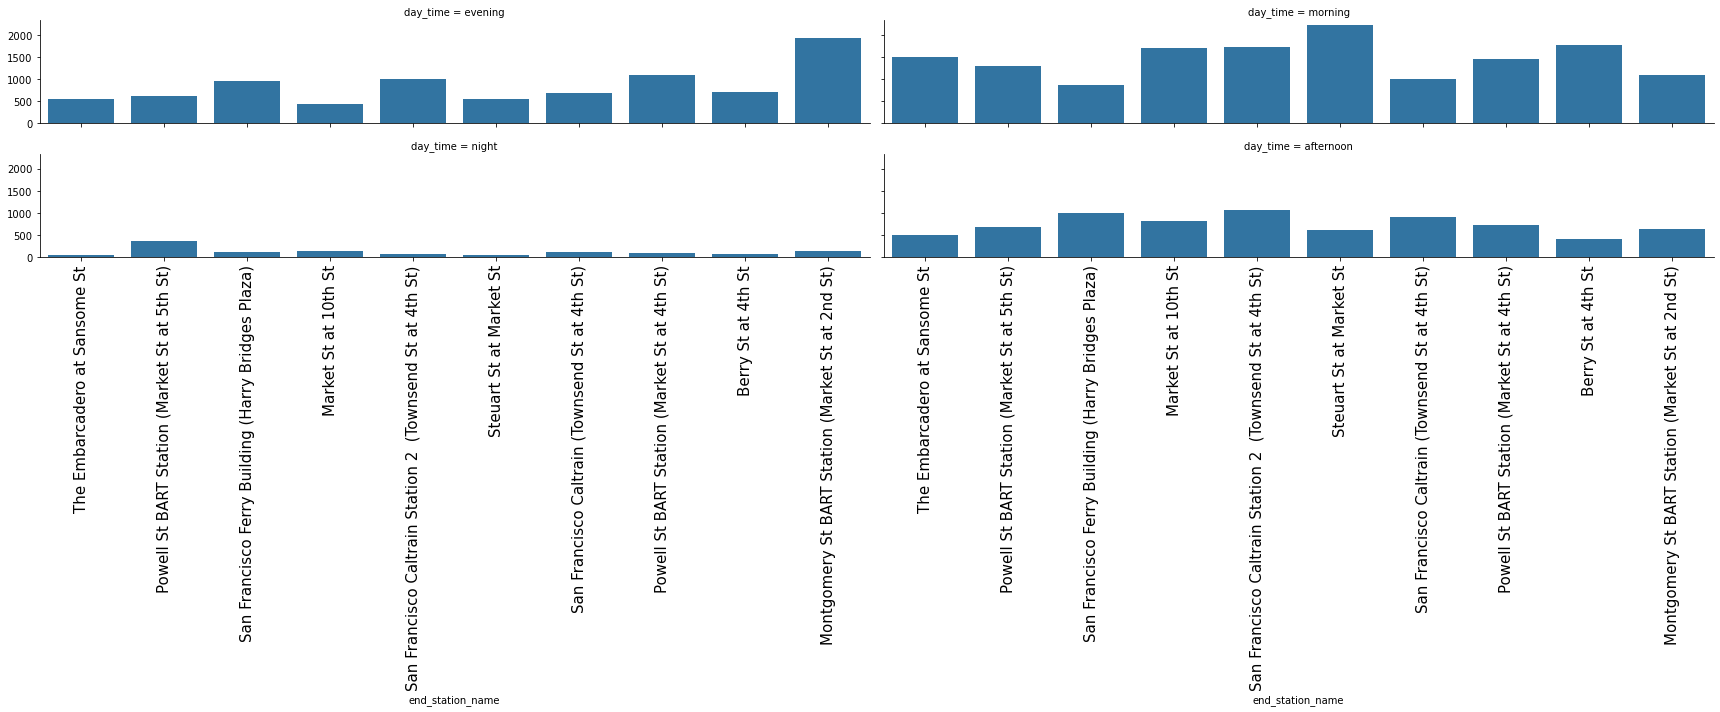

In [86]:

plt.figure(figsize=(28,10))
g = sns.FacetGrid(data = df_top_ten_2, col = 'day_time', col_wrap=2);
g.map(sns.countplot,'end_station_name', order = None);
g.set_xticklabels(rotation = 90, fontsize = 15)
g.fig.set_size_inches(24,10);
plt.tight_layout();

#### **Observation:** 
* We see a great increase in the evening compared to morning
* So the order is evening > morning > afternoon > night

In [84]:
# Having done all of the necessary exploration

# *Saving the dataframe for explanation*

In [85]:
df_new.to_csv('cleaned_data.csv', index = False)